In [3]:
import numpy as np
import matplotlib.pyplot as plt
from module import generate_target_function, generate_data, pla, calculate_error, linear_target_function, linear_regression, pocket_pla

## Pocket Pla
Do 1000 executions of:
1. Choose a target function.
2. Generate N1 data from the distribution $(X \in [1, -1] \times [1, -1])$ and classify it with the target function.
3. Randomly select 10% of the points and invert their labels
3. Run the Pocket PLA algorithm
4. Evaluate on a set of N2 test points without label inversion.

#### Show the average Ein and Eout for the following configurations (don't forget the scatterplot graphs, as before):

(a) Initial weight 0; i = 10; N1 = 100; N2 = 1000.
<br>
(b) Initial weight 0; i = 50; N1 = 100; N2 = 1000.
<br>
(c) Initialize with linear regression; i = 10; N1 = 100; N2 = 1000.
<br>
(d) Initialize with linear regression; i = 50; N1 = 100; N2 = 1000

In [2]:
# Função para plotar resultados
def plot_results(X, y, w, a, b, c, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
    x_vals = np.linspace(-1, 1, 100)
    plt.plot(x_vals, -(a / b) * x_vals - c / b, 'k-', label='Target Function')
    plt.plot(x_vals, -(w[1] / w[2]) * x_vals - w[0] / w[2], 'g-', label='Pocket PLA Hypothesis')
    plt.title(title)
    plt.xlim([-1, 1])
    plt.ylim([-1, 1])
    plt.legend()
    plt.show()

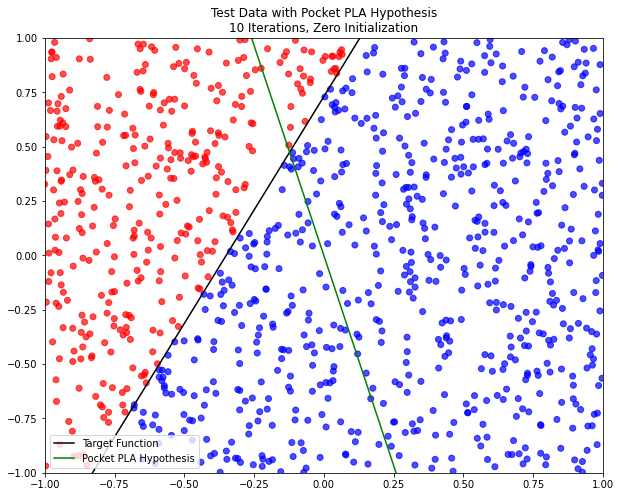

(a) Inicializando com 0, i = 10; N1 = 100; N2 = 1000.
  Ein Mean: 0.1739
  Ein STD: 0.04748884079444349
  Eout mean: 0.113214
  Eout std: 0.06164701293655679



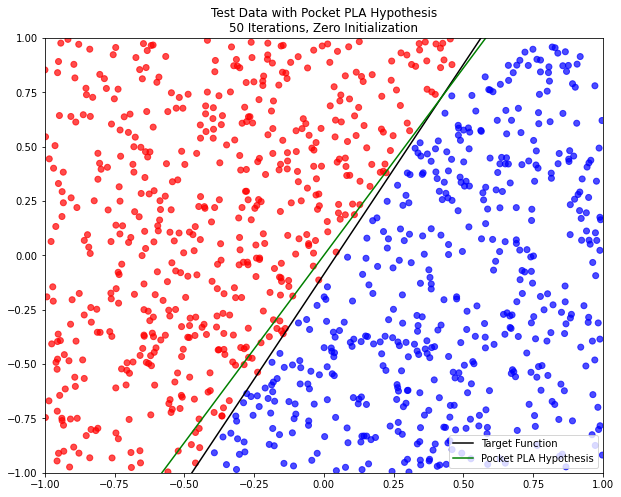

(b) Inicializando com 0, i = 50; N1 = 100; N2 = 1000.
  Ein Mean: 0.12843000000000002
  Ein STD: 0.026085150948384414
  Eout mean: 0.060557
  Eout std: 0.039504211813425665



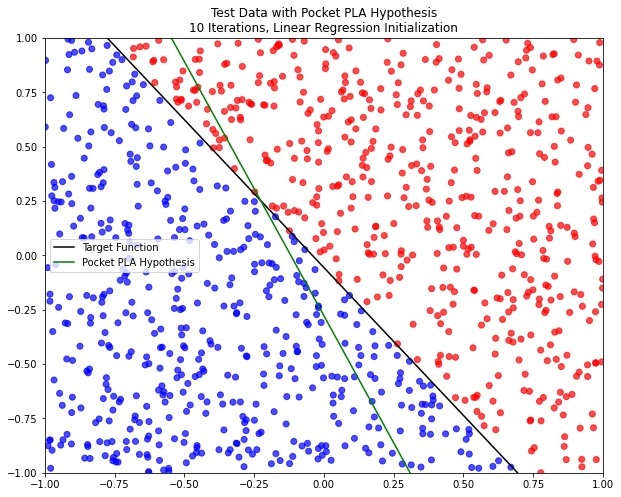

(c) Inicializando com Regressão Linear, i = 10; N1 = 100; N2 = 1000.
  Ein Mean: 0.13008
  Ein STD: 0.023941461943665848
  Eout mean: 0.05539200000000001
  Eout std: 0.03181509603945901



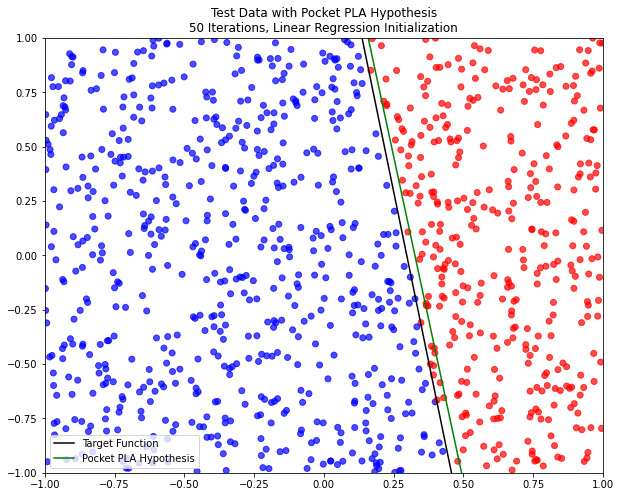

(d) Inicializando com Regressão Linear, i = 50; N1 = 100; N2 = 1000.
  Ein Mean: 0.11929000000000002
  Ein STD: 0.01917800563145188
  Eout mean: 0.04629300000000001
  Eout std: 0.029395767569498844



In [7]:
# Experimento
def experiment(num_runs, num_points_train, num_points_test, max_iterations, initialize_with_linear_regression):
    ein_list = []
    eout_list = []

    for _ in range(num_runs):
        a, b, c = generate_target_function()
        lg_tg = linear_target_function(a, b, c)
        X_train, y_train = generate_data(num_points_train, lg_tg, noise_ratio=0.1)
        
        if initialize_with_linear_regression:
            w_init = linear_regression(X_train, y_train)
        else:
            w_init = np.zeros(X_train.shape[1] + 1)

        w_pocket, ein = pocket_pla(X_train, y_train, w_init, max_iterations)

        X_test, y_test = generate_data(num_points_test, lg_tg)
        eout = calculate_error(X_test, y_test, w_pocket)

        ein_list.append(ein)
        eout_list.append(eout)

        if _ == 0:  # Plotar apenas o primeiro caso como exemplo
            plt.figure(figsize=(10, 8))
            plot_results(X_test, y_test, w_pocket, a, b, c, f'Test Data with Pocket PLA Hypothesis\n{max_iterations} Iterations, {"Linear Regression" if initialize_with_linear_regression else "Zero"} Initialization')

    return np.mean(ein_list), np.std(ein_list), np.mean(eout_list), np.std(eout_list)

# Parâmetros
num_runs = 1000
num_points_train = 100
num_points_test = 1000

# Executar experimentos para os diferentes casos
cases = [
    {"description": "(a) Inicializando com 0, i = 10; N1 = 100; N2 = 1000.", "max_iterations": 10, "initialize_with_linear_regression": False},
    {"description": "(b) Inicializando com 0, i = 50; N1 = 100; N2 = 1000.", "max_iterations": 50, "initialize_with_linear_regression": False},
    {"description": "(c) Inicializando com Regressão Linear, i = 10; N1 = 100; N2 = 1000.", "max_iterations": 10, "initialize_with_linear_regression": True},
    {"description": "(d) Inicializando com Regressão Linear, i = 50; N1 = 100; N2 = 1000.", "max_iterations": 50, "initialize_with_linear_regression": True},
]

for case in cases:
    mean_ein, std_ein, mean_eout, std_eout = experiment(num_runs, num_points_train, num_points_test, case["max_iterations"], case["initialize_with_linear_regression"])
    print(f"{case['description']}")
    print(f"  Ein Mean: {mean_ein}")
    print(f"  Ein STD: {std_ein}")
    print(f"  Eout mean: {mean_eout}")
    print(f"  Eout std: {std_eout}\n")
